In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Reading it in grey scale

In [2]:
img = cv2.imread('ring1.png',cv2.COLOR_BGR2GRAY)
# Displaying the image 


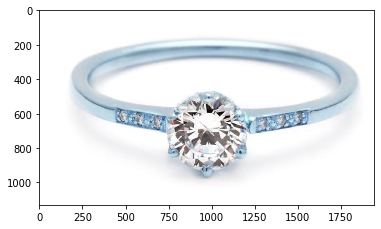

In [3]:
plt.imshow(img)

## Getting a black background

In [4]:
image = cv2.imread('ring1.png',cv2.COLOR_BGR2GRAY)
r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
lower_white = np.array([220, 220, 220], dtype=np.uint8)
upper_white = np.array([255, 255, 255], dtype=np.uint8)
mask = cv2.inRange(resized, lower_white, upper_white) # could also use threshold
res = cv2.bitwise_not(resized, resized, mask)

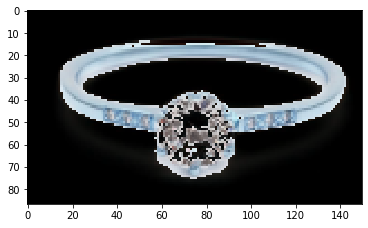

In [5]:
plt.imshow(res)

In [6]:
# Read image. 
#img = cv2.imread('pend1.jpg',cv2.COLOR_BGR2GRAY)
img = cv2.imread('ring1.png', cv2.IMREAD_COLOR) 

print(img.shape)
# Convert to grayscale. 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 


(1130, 1944, 3)


## trying to detect the circles

In [ ]:
gray_blurred = cv2.bilateralFilter(gray, 11, 30, 30)

# tune circles size
detected_circles = cv2.HoughCircles(gray_blurred,
                                    cv2.HOUGH_GRADIENT, 20,
                                    param1=50,
                                    param2=30,
                                    minDist=100,
                                    minRadius=10,
                                    maxRadius=30)

if detected_circles is not None:
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))

    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]

        # Draw the circumference of the circle.
        cv2.circle(img, (a, b), r, (0, 255, 0), 2)

        # Draw a small circle (of radius 1) to show the center.
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3)

cv2.imshow("Detected circles", img)
cv2.waitKey(0)